In [75]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize, sent_tokenize
import os
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import collections

In [2]:
paragraphs = pd.read_csv("data/share_repurchase_paragraphs.csv")

In [3]:
paragraphs.head()

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
0,A,0001090872-17-000018,Share Repurchase Authorization Date,"May 28, 2015",20150528,20200000.00,ones,"On May 28, 2015 we announced that our board ..."
1,A,0001090872-17-000018,Share Repurchase Authorization,The 2015 share repurchase program authorizes t...,1140000000,1.14,billions,"On May 28, 2015 we announced that our board ..."
2,A,0001090872-17-000018,Share Repurchase Intention,remaining authorization to repurchase up to,610000000,610.00,millions,"Table of Contents 2016, upon the completion ..."
3,A,0001090872-17-000018,Share Repurchase Count,repurchased,4100000,4.10,millions,"Table of Contents 2016, upon the completion ..."
4,A,0001090872-17-000018,Amount Spent on Share Repurchases,repurchased,194000000,194.00,millions,"Table of Contents 2016, upon the completion ..."


In [4]:
paragraphs.paragraph_text[0]

'On May 28, 2015 we  announced that our board  of directors had approved a  new share repurchase program  (the   "2015 repurchase program"). The 2015 share repurchase program authorizes the purchase of up to $1.14  billion   of our common stock at the company\'s discretion  through and including November 1, 2018. The 2015  repurchase   program does  not require  the company  to  acquire a  specific number  of  shares and  may be  suspended  or   discontinued at any time. During the year ended October 31,                                                        95'

In [5]:
test_p = paragraphs.paragraph_text[2].lower()

In [6]:
test_p

'table of contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.  during  the  year  ended  october  31,  2017  we  repurchased   approximately 4.1 million shares for $194  million under this authorization. as  of october 31, 2017, we  had   remaining authorization to repurchase up to $610 million of our common stock under this program'

In [7]:
paragraphs.text[1]

'The 2015 share repurchase program authorizes the purchase of up to'

In [51]:
test_p_clean = re.sub(r"[,.;@#?!&$]+\ *", " ", test_p)

In [52]:
test_p_clean

'table of contents   2016 upon the completion of our previous repurchase program we repurchased approximately 8 3 million shares   for  336  million  under  this  authorization during  the  year  ended  october  31 2017  we  repurchased   approximately 4 1 million shares for  194  million under this authorization as  of october 31 2017 we  had   remaining authorization to repurchase up to  610 million of our common stock under this program'

In [53]:
test_bow = word_tokenize(test_p_clean)

In [54]:
test_bow = [word for word in test_bow if word not in stopwords.words('english')]

In [87]:
def bow_from_paragraph(p):
    p_lower = p.lower()
    p_clean = re.sub(r"[,.;@#?!&$`')(-]+\ *", " ", p_lower)
    p_bow = word_tokenize(p_clean)
    p_stop = [word for word in p_bow if word not in stopwords.words("english")]
    
    return(p_stop)

In [88]:
test_bow_2 = bow_from_paragraph(test_p)

In [89]:
unique_paragraphs = paragraphs.paragraph_text.unique()
len(unique_paragraphs)

909

In [90]:
full_bow = list()
for p in unique_paragraphs:
    p_bow = bow_from_paragraph(p)
    full_bow.extend(p_bow)

In [98]:
ps = PorterStemmer()

In [99]:
full_bow_stem = [ps.stem(word) for word in full_bow]

In [100]:
full_bow_count = collections.Counter(full_bow_stem)

In [101]:
full_bow_count_thresh = dict((k, v) for k, v in full_bow_count.items() if v >= 100)

In [102]:
full_bow_count_thresh

{'may': 383,
 '2015': 444,
 'announc': 199,
 'board': 690,
 'director': 562,
 'approv': 220,
 'new': 114,
 'share': 2867,
 'repurchas': 2752,
 'program': 1366,
 '``': 117,
 "''": 107,
 'author': 1084,
 'purchas': 634,
 '1': 1380,
 'billion': 708,
 'common': 1051,
 'stock': 1449,
 'compani': 864,
 'includ': 174,
 'novemb': 206,
 '2018': 227,
 'number': 280,
 'time': 359,
 'year': 336,
 'end': 295,
 'octob': 200,
 '31': 710,
 '2016': 662,
 'approxim': 305,
 '8': 232,
 '3': 486,
 'million': 1511,
 '2017': 1683,
 '4': 399,
 'remain': 286,
 'dividend': 115,
 'juli': 136,
 '2014': 127,
 'aggreg': 151,
 '0': 695,
 'decemb': 692,
 'expir': 143,
 'open': 223,
 'market': 346,
 'privat': 124,
 'negoti': 110,
 'transact': 225,
 'condit': 116,
 '9': 213,
 '6': 271,
 'averag': 276,
 'cost': 253,
 'per': 348,
 '10': 128,
 '500': 115,
 '30': 233,
 '5': 428,
 'price': 337,
 'increas': 121,
 'septemb': 110,
 'amount': 216,
 'quarter': 145,
 '000': 206,
 'total': 520,
 '7': 240,
 'period': 140,
 'date': 

fig, ax = plt.subplots(figsize = (15, 10))
plt.bar(full_bow_count_thresh)
plt.xticks(rotation=90);

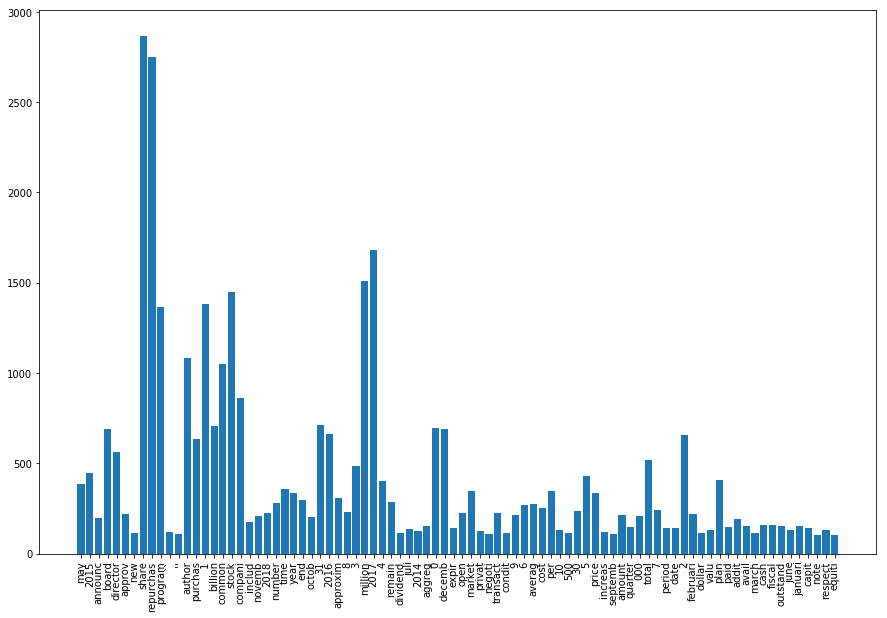

In [103]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.bar(range(len(full_bow_count_thresh)), list(full_bow_count_thresh.values()), align='center')
plt.xticks(range(len(full_bow_count_thresh)), list(full_bow_count_thresh.keys()))
plt.xticks(rotation=90)
plt.show();

In [8]:
test_p_sent = sent_tokenize(test_p)

In [9]:
test_p_sent

['table of contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.',
 'during  the  year  ended  october  31,  2017  we  repurchased   approximately 4.1 million shares for $194  million under this authorization.',
 'as  of october 31, 2017, we  had   remaining authorization to repurchase up to $610 million of our common stock under this program']

In [10]:
test_p_sent_bow = list()
for sent in test_p_sent:
    test_p_sent_bow.append(word_tokenize(sent))

In [11]:
test_p_sent_bow

[['table',
  'of',
  'contents',
  '2016',
  ',',
  'upon',
  'the',
  'completion',
  'of',
  'our',
  'previous',
  'repurchase',
  'program',
  ',',
  'we',
  'repurchased',
  'approximately',
  '8.3',
  'million',
  'shares',
  'for',
  '$',
  '336',
  'million',
  'under',
  'this',
  'authorization',
  '.'],
 ['during',
  'the',
  'year',
  'ended',
  'october',
  '31',
  ',',
  '2017',
  'we',
  'repurchased',
  'approximately',
  '4.1',
  'million',
  'shares',
  'for',
  '$',
  '194',
  'million',
  'under',
  'this',
  'authorization',
  '.'],
 ['as',
  'of',
  'october',
  '31',
  ',',
  '2017',
  ',',
  'we',
  'had',
  'remaining',
  'authorization',
  'to',
  'repurchase',
  'up',
  'to',
  '$',
  '610',
  'million',
  'of',
  'our',
  'common',
  'stock',
  'under',
  'this',
  'program']]

In [12]:
for ind, sent in enumerate(test_p_sent_bow):
    test_p_sent_bow[ind] = [word for word in sent if word not in stopwords.words('english')]

In [13]:
test_p_sent_bow

[['table',
  'contents',
  '2016',
  ',',
  'upon',
  'completion',
  'previous',
  'repurchase',
  'program',
  ',',
  'repurchased',
  'approximately',
  '8.3',
  'million',
  'shares',
  '$',
  '336',
  'million',
  'authorization',
  '.'],
 ['year',
  'ended',
  'october',
  '31',
  ',',
  '2017',
  'repurchased',
  'approximately',
  '4.1',
  'million',
  'shares',
  '$',
  '194',
  'million',
  'authorization',
  '.'],
 ['october',
  '31',
  ',',
  '2017',
  ',',
  'remaining',
  'authorization',
  'repurchase',
  '$',
  '610',
  'million',
  'common',
  'stock',
  'program']]

In [14]:
ps = PorterStemmer()

In [15]:
for ind, sent in enumerate(test_p_sent_bow):
    test_p_sent_bow[ind] = [ps.stem(word) for word in sent]

In [16]:
test_p_sent_bow

[['tabl',
  'content',
  '2016',
  ',',
  'upon',
  'complet',
  'previou',
  'repurchas',
  'program',
  ',',
  'repurchas',
  'approxim',
  '8.3',
  'million',
  'share',
  '$',
  '336',
  'million',
  'author',
  '.'],
 ['year',
  'end',
  'octob',
  '31',
  ',',
  '2017',
  'repurchas',
  'approxim',
  '4.1',
  'million',
  'share',
  '$',
  '194',
  'million',
  'author',
  '.'],
 ['octob',
  '31',
  ',',
  '2017',
  ',',
  'remain',
  'author',
  'repurchas',
  '$',
  '610',
  'million',
  'common',
  'stock',
  'program']]

In [17]:
possible_important_words = ["remain"]

In [18]:
months = ["january", "febuary", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]

In [19]:
stem_months = [ps.stem(word) for word in months]

In [167]:
units = ["hundred", "thousand", "million", "billion", "trillion"]
stem_units = [ps.stem(word) for word in units]

In [21]:
# This is how to check to see if word in list is in another list
# any(word in test_p_sent_bow[2] for word in possible_important_words)

In [22]:
for sent in test_p_sent_bow:
    if any(word in sent for word in possible_important_words):
        print(set(possible_important_words) & set(sent))
        for ind, token in enumerate(sent):
            if token in stem_months:
                print("time: ", sent[ind:ind+4])
            elif token == "$":
                print("amount: ", sent[ind+1])#, sent[ind+2])
            elif token in units:
                print("units: ", sent[ind])

{'remain'}
time:  ['octob', '31', ',', '2017']
amount:  610
units:  million


In [79]:
unique_paragraphs

array(['On May 28, 2015 we  announced that our board  of directors had approved a  new share repurchase program  (the   "2015 repurchase program"). The 2015 share repurchase program authorizes the purchase of up to $1.14  billion   of our common stock at the company\'s discretion  through and including November 1, 2018. The 2015  repurchase   program does  not require  the company  to  acquire a  specific number  of  shares and  may be  suspended  or   discontinued at any time. During the year ended October 31,                                                        95',
       'Table of Contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.  During  the  year  ended  October  31,  2017  we  repurchased   approximately 4.1 million shares for $194  million under this authorization. As  of October 31, 2017, we  had   remaining authorization to repurchase up to $610 million of

In [157]:
p_with_remain = list()
for p in unique_paragraphs:
    if "remain" in p:
        p_with_remain.append(p.lower())
        #print(p, "\n")
    #p_token = word_tokenize(p)
    #if "remaining" in p_token:
    #    p_with_remaining.append(p)
len(p_with_remain)

Table of Contents   2016, upon the completion of our previous repurchase program, we repurchased approximately 8.3 million shares   for $336  million  under  this  authorization.  During  the  year  ended  October  31,  2017  we  repurchased   approximately 4.1 million shares for $194  million under this authorization. As  of October 31, 2017, we  had   remaining authorization to repurchase up to $610 million of our common stock under this program 

4. Share Repurchase Programs and Dividends   Since July 2014, our Board of Directors has approved six share repurchase programs aggregating $11.0  billion   of authority. As of December 31, 2017, $450  million remained unused under a repurchase program that  expires   on December 31,  2018. Share  repurchases under  our repurchase programs  may be  made through  a variety  of   methods, which  may  include  open market  purchases,  privately  negotiated transactions,  block  trades  or   accelerated share repurchase transactions.  Any such 

250

In [160]:
remain_sent_word_token = list()
for p in p_with_remain:
    sent_tokens = sent_tokenize(p)
    #print(sent_tokens)
    words = list()
    for sent in sent_tokens:
        word_tokens = word_tokenize(sent)
        words.append(word_tokens)
        #print(word_tokens)
    remain_sent_word_token.append(words)

In [161]:
remain_sent_word_token

[[['table',
   'of',
   'contents',
   '2016',
   ',',
   'upon',
   'the',
   'completion',
   'of',
   'our',
   'previous',
   'repurchase',
   'program',
   ',',
   'we',
   'repurchased',
   'approximately',
   '8.3',
   'million',
   'shares',
   'for',
   '$',
   '336',
   'million',
   'under',
   'this',
   'authorization',
   '.'],
  ['during',
   'the',
   'year',
   'ended',
   'october',
   '31',
   ',',
   '2017',
   'we',
   'repurchased',
   'approximately',
   '4.1',
   'million',
   'shares',
   'for',
   '$',
   '194',
   'million',
   'under',
   'this',
   'authorization',
   '.'],
  ['as',
   'of',
   'october',
   '31',
   ',',
   '2017',
   ',',
   'we',
   'had',
   'remaining',
   'authorization',
   'to',
   'repurchase',
   'up',
   'to',
   '$',
   '610',
   'million',
   'of',
   'our',
   'common',
   'stock',
   'under',
   'this',
   'program']],
 [['4.',
   'share',
   'repurchase',
   'programs',
   'and',
   'dividends',
   'since',
   'july',
   '20

In [165]:
for ind_1, p in enumerate(remain_sent_word_token):
    for ind_2, sent in enumerate(p):
        remain_sent_word_token[ind_1][ind_2] = [word for word in sent if word not in stopwords.words('english')]
        remain_sent_word_token[ind_1][ind_2] = [ps.stem(word) for word in sent]

In [166]:
remain_sent_word_token

[[['tabl',
   'content',
   '2016',
   ',',
   'upon',
   'complet',
   'previou',
   'repurchas',
   'program',
   ',',
   'repurchas',
   'approxim',
   '8.3',
   'million',
   'share',
   '$',
   '336',
   'million',
   'author',
   '.'],
  ['year',
   'end',
   'octob',
   '31',
   ',',
   '2017',
   'repurchas',
   'approxim',
   '4.1',
   'million',
   'share',
   '$',
   '194',
   'million',
   'author',
   '.'],
  ['octob',
   '31',
   ',',
   '2017',
   ',',
   'remain',
   'author',
   'repurchas',
   '$',
   '610',
   'million',
   'common',
   'stock',
   'program']],
 [['4.',
   'share',
   'repurchas',
   'program',
   'dividend',
   'sinc',
   'juli',
   '2014',
   ',',
   'board',
   'director',
   'approv',
   'six',
   'share',
   'repurchas',
   'program',
   'aggreg',
   '$',
   '11.0',
   'billion',
   'author',
   '.'],
  ['decemb',
   '31',
   ',',
   '2017',
   ',',
   '$',
   '450',
   'million',
   'remain',
   'unus',
   'repurchas',
   'program',
   'expir',

In [176]:
for p in remain_sent_word_token:
    #print(p)
    for sent in p:
        #print(sent)
        if 'remain' in sent:
            #print(sent)
        #if any(word in sent for word in possible_important_words):
            #print(set(possible_important_words) & set(sent))
            for ind, token in enumerate(sent):
                #print(token)
                if token in stem_months:
                    print("month: ", sent[ind:ind+4])
                elif token == "$":
                    print("amount: ", sent[ind+1])#, sent[ind+2])
                elif token in stem_units:
                    print("units: ", sent[ind])
            print("\n")

month:  ['octob', '31', ',', '2017']
amount:  610
units:  million


month:  ['decemb', '31', ',', '2017']
amount:  450
units:  million
month:  ['decemb', '31', ',', '2018.']
month:  ['may', 'made', 'varieti', 'method']
month:  ['may', 'includ', 'open', 'market']


amount:  415.1
units:  million
month:  ['decemb', '30', ',', '2017']


month:  ['may', '2016', ',', 'compani']
month:  ['august', '2013', 'share', 'repurchas']
amount:  750
units:  million


month:  ['septemb', '30', ',', '2017']
amount:  788.9
units:  million


amount:  792.5
units:  million


month:  ['decemb', '31', ',', '2017']
amount:  446.3
units:  million


month:  ['januari', '31', ',', '2018']
units:  million


month:  ['decemb', '31', ',', '2017']
amount:  246
units:  million


units:  million
amount:  4,000
amount:  2,762
amount:  -
amount:  -
month:  ['novemb', '21', ',', '2014']
amount:  3,845
amount:  -
amount:  296
month:  ['decemb', '31', ',', 'n/a']
amount:  1,238
amount:  1,083
amount:  1,083


month:  ['dec

units:  billion
amount:  4.9
units:  billion
amount:  20.0
units:  billion


month:  ['decemb', '31', ',', '2017']


amount:  640.9
units:  million
amount:  359.1
units:  million
amount:  1.0
units:  billion


month:  ['decemb', '31', ',', '2017']
amount:  477.4
units:  million


amount:  585.8
units:  million
amount:  414.2
units:  million
amount:  1.0
units:  billion


month:  ['june', '30', ',', '2017']
amount:  2.10
units:  billion


month:  ['decemb', '31', ',', '2017']


month:  ['decemb', '31', ',', '2017']
amount:  1,950
units:  million


amount:  400
units:  million
amount:  601
units:  million
month:  ['decemb', '31', ',', '2017']


month:  ['januari', '31', ',', '2018']
amount:  18.8
units:  billion


month:  ['septemb', '30', ',', '2017']
month:  ['juli', '2015', 'purchas', 'approxim']
units:  million


amount:  1.2
units:  billion
month:  ['decemb', '31', ',', '2019']
amount:  943.5
units:  million
month:  ['decemb', '31', ',', '2017.']
month:  ['may', 'continu', 'establis

In [82]:
"Share Repurchase Program   In May 2017, the Company's Board of Directors increased the share repurchase authorization from $175  billion   to $210 billion of the Company's  common stock, of which $166 billion  had been utilized as of September  30,   2017. The Company's share repurchase program does not  obligate it to acquire any specific number of  shares"

"Share Repurchase Program   In May 2017, the Company's Board of Directors increased the share repurchase authorization from $175  billion   to $210 billion of the Company's  common stock, of which $166 billion  had been utilized as of September  30,   2017. The Company's share repurchase program does not  obligate it to acquire any specific number of  shares"

In [83]:
"On February 15, 2018, AbbVie announced that its board of directors declared an increase in the company's   quarterly cash dividend from $0.71 per share to $0.96 per share beginning with the dividend payable on May   15, 2018 to stockholders of record as of April 13, 2018"

"On February 15, 2018, AbbVie announced that its board of directors declared an increase in the company's   quarterly cash dividend from $0.71 per share to $0.96 per share beginning with the dividend payable on May   15, 2018 to stockholders of record as of April 13, 2018"

In [84]:
'Stock Repurchase Program   To facilitate  our stock  repurchase program,  designed  to return  value to  our stockholders  and  minimize   dilution from  stock  issuances, we  may  repurchase shares  in  the open  market  or enter  into  structured   repurchase agreements with  third parties.  In January  2017, our  Board of  Directors approved  a new  stock   repurchase program granting us authority to repurchase up to $2.5 billion in common stock through the end  of   fiscal 2019. The new stock repurchase program approved by  our Board of Directors is similar to our  previous   stock repurchase programs'

'Stock Repurchase Program   To facilitate  our stock  repurchase program,  designed  to return  value to  our stockholders  and  minimize   dilution from  stock  issuances, we  may  repurchase shares  in  the open  market  or enter  into  structured   repurchase agreements with  third parties.  In January  2017, our  Board of  Directors approved  a new  stock   repurchase program granting us authority to repurchase up to $2.5 billion in common stock through the end  of   fiscal 2019. The new stock repurchase program approved by  our Board of Directors is similar to our  previous   stock repurchase programs'

In [85]:
"Common Stock Repurchases   The Company's common stock repurchase program has been in place since August 2004. In the aggregate, the   Board of Directors has authorized the Company to repurchase $6.2 billion of the Company's common stock under   the program. The Company may repurchase outstanding shares of its common stock from time to time in the open   market and through privately negotiated transactions. Unless terminated earlier by resolution of the   Company's Board of Directors, the repurchase program will expire when the Company has repurchased all shares   authorized under the program. As of October 28, 2017, the Company had repurchased a total of approximately   147.0 million shares of its common stock for approximately $5.4 billion under this program. An additional   $792.5 million remains available for repurchase of shares under the current authorized program. The   repurchased shares are held as authorized but unissued shares of common stock. In connection with the   Acquisition, the Company temporarily suspended the common stock repurchase plan"

"Common Stock Repurchases   The Company's common stock repurchase program has been in place since August 2004. In the aggregate, the   Board of Directors has authorized the Company to repurchase $6.2 billion of the Company's common stock under   the program. The Company may repurchase outstanding shares of its common stock from time to time in the open   market and through privately negotiated transactions. Unless terminated earlier by resolution of the   Company's Board of Directors, the repurchase program will expire when the Company has repurchased all shares   authorized under the program. As of October 28, 2017, the Company had repurchased a total of approximately   147.0 million shares of its common stock for approximately $5.4 billion under this program. An additional   $792.5 million remains available for repurchase of shares under the current authorized program. The   repurchased shares are held as authorized but unissued shares of common stock. In connection with the   Acquis

In [86]:
'Issuer Purchases of Equity Securities   Autodesk\'s stock repurchase program is largely to help offset the dilution from the issuance of stock under   our employee stock plans and for such other purposes as may be in the interests of Autodesk and its   stockholders, and has the effect of returning excess cash generated from our business to stockholders. The   share repurchase program does not have an expiration date and the pace and timing of repurchases will depend   on factors such as cash generation from operations, available surplus, the volume of employee stock plan   activity, cash requirements for acquisitions, economic and market conditions, stock price and legal and   regulatory requirements. In September 2016, the Board of Directors approved a plan which authorized the   repurchase of up to an additional 30.0 million shares of the Company\'s common stock. As of January 31, 2018,   10.4 million shares have been repurchased under this plan. During the three and twelve months ended January   31, 2018, we repurchased 2.5 million and 6.9 million shares, respectively, of our common stock under the   Board of Director authorized share repurchase program. At January 31, 2018, 19.6 million shares remained   available for repurchase under the repurchase program approved by the Board of Directors. See Note 9,   "Stockholders\' (Deficit) Equity (Deficit)," in the Notes to Consolidated Financial Statements for further   discussion'

'Issuer Purchases of Equity Securities   Autodesk\'s stock repurchase program is largely to help offset the dilution from the issuance of stock under   our employee stock plans and for such other purposes as may be in the interests of Autodesk and its   stockholders, and has the effect of returning excess cash generated from our business to stockholders. The   share repurchase program does not have an expiration date and the pace and timing of repurchases will depend   on factors such as cash generation from operations, available surplus, the volume of employee stock plan   activity, cash requirements for acquisitions, economic and market conditions, stock price and legal and   regulatory requirements. In September 2016, the Board of Directors approved a plan which authorized the   repurchase of up to an additional 30.0 million shares of the Company\'s common stock. As of January 31, 2018,   10.4 million shares have been repurchased under this plan. During the three and twelve months e

In [115]:
A = [[9, 5, 6], [1, 2, 3]]

sum(A, [])

[9, 5, 6, 1, 2, 3]

In [177]:
paragraphs.data_key_friendly_name.unique()

array(['Share Repurchase Authorization Date',
       'Share Repurchase Authorization', 'Share Repurchase Intention',
       'Share Repurchase Count', 'Amount Spent on Share Repurchases',
       'Share Repurchase Utilization', 'Unknown Share Repurchase Data'],
      dtype=object)

In [ ]:
date auth, intent, count, amount, util, unk